In [6]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import gridspec
import cartopy.crs as ccrs
import cartopy
import itertools
import tqdm
import datetime
from scipy.stats import linregress
from scipy.interpolate import griddata
import warnings
warnings.filterwarnings("ignore")

In [9]:
datapath = '/Users/carmennab/Dropbox/OI_PolarSnow/EASE/'
freebs = np.asarray(Dataset(datapath+'freeboard_daily_interpolated/CS2_CPOM_full.nc')['Radar Freeboard'])
temps = np.asarray(Dataset(datapath+'data/ERA5_temp.nc')['Temperature'])
temps[np.isnan(freebs)]=np.nan                                                                                                                                                                                                                                              

In [10]:
# do smooth anoms for each grid cell

T1 = 15 ## for 31-day running mean put T=15
T2 = 4 ## for 9-day running mean of anomalies put T=4

data = [temps]

temp_running_mean_anoms = np.full(temps.shape,np.nan)
  
anoms_big = np.full(temps.shape,np.nan)

for day in tqdm.trange(temps.shape[0]):

    # 31-day running mean for each grid cell in time dimension
    monthly = np.nanmean(temps[day-T1:day+T1],axis=0) 

    # now make anomalies from 30 day means

    anoms_big[day] = temps[day] - monthly 

# 9 day mean of anoms for each grid cell in time dimension
for day in tqdm.trange(temps.shape[0]):

    temp_running_mean_anoms[day] = np.nanmean(anoms_big[day-T2:day+T2],axis=0) 

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4018/4018 [00:13<00:00, 287.44it/s]


Text(0.5, 0, 'Temperature')

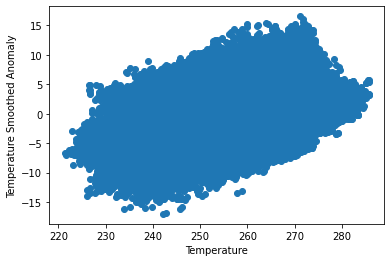

In [11]:
plt.scatter(temps,temp_running_mean_anoms)
plt.ylabel('Temperature Smoothed Anomaly')
plt.xlabel('Temperature')